In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0     # Normalize the data

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# flatten the data
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [5]:
# build the model
model = Sequential([
    Dense(256, activation = 'relu', input_shape = (784, )),
    Dropout(0.3),     # Dropout for regularization
    Dense(128, activation = 'relu'),
    Dropout(0.3),
    Dense(64, activation = 'relu'),
    Dropout(0.3),
    Dense(10, activation = 'softmax')   # output layer --> (10 classes for digits 0 - 9)
])

In [6]:
import matplotlib.pyplot as plt

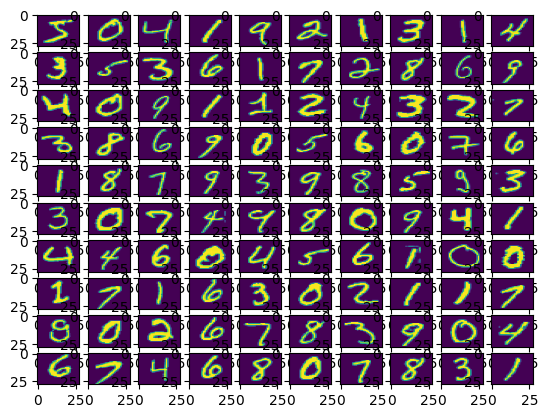

In [7]:
fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
  for j in range(10):
    ax[i][j].imshow(x_train[k].reshape(28,28), aspect = 'auto')
    k += 1

plt.show()

In [8]:
# compile the model
model.compile(optimizer = Adam(), loss = SparseCategoricalCrossentropy(), metrics = [SparseCategoricalAccuracy()])

In [9]:
# Set up callbacks
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.5, patience=5, min_lr=1e-6)

In [10]:
# Train the model with validation split and callbacks
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[checkpoint, early_stopping, reduce_lr])

Epoch 1/50
750/750 [==============================] - 5s 5ms/step - loss: 0.4734 - sparse_categorical_accuracy: 0.8571 - val_loss: 0.1509 - val_sparse_categorical_accuracy: 0.9557 - lr: 0.0010
Epoch 2/50
 40/750 [>.............................] - ETA: 2s - loss: 0.2301 - sparse_categorical_accuracy: 0.9391

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


750/750 [==============================] - 3s 4ms/step - loss: 0.2026 - sparse_categorical_accuracy: 0.9426 - val_loss: 0.1167 - val_sparse_categorical_accuracy: 0.9667 - lr: 0.0010
Epoch 3/50
750/750 [==============================] - 3s 4ms/step - loss: 0.1559 - sparse_categorical_accuracy: 0.9560 - val_loss: 0.1022 - val_sparse_categorical_accuracy: 0.9707 - lr: 0.0010
Epoch 4/50
750/750 [==============================] - 3s 4ms/step - loss: 0.1309 - sparse_categorical_accuracy: 0.9634 - val_loss: 0.0958 - val_sparse_categorical_accuracy: 0.9732 - lr: 0.0010
Epoch 5/50
750/750 [==============================] - 3s 4ms/step - loss: 0.1120 - sparse_categorical_accuracy: 0.9673 - val_loss: 0.0970 - val_sparse_categorical_accuracy: 0.9735 - lr: 0.0010
Epoch 6/50
750/750 [==============================] - 3s 5ms/step - loss: 0.1019 - sparse_categorical_accuracy: 0.9703 - val_loss: 0.0891 - val_sparse_categorical_accuracy: 0.9767 - lr: 0.0010
Epoch 7/50
750/750 [==========================

In [11]:
# evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0732 - sparse_categorical_accuracy: 0.9819
Test accuracy: 0.9819


In [12]:
# Load the best model and re-evaluate
model.load_weights('best_model.h5')
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy with the best model: {accuracy:.4f}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0732 - sparse_categorical_accuracy: 0.9819
Test accuracy with the best model: 0.9819


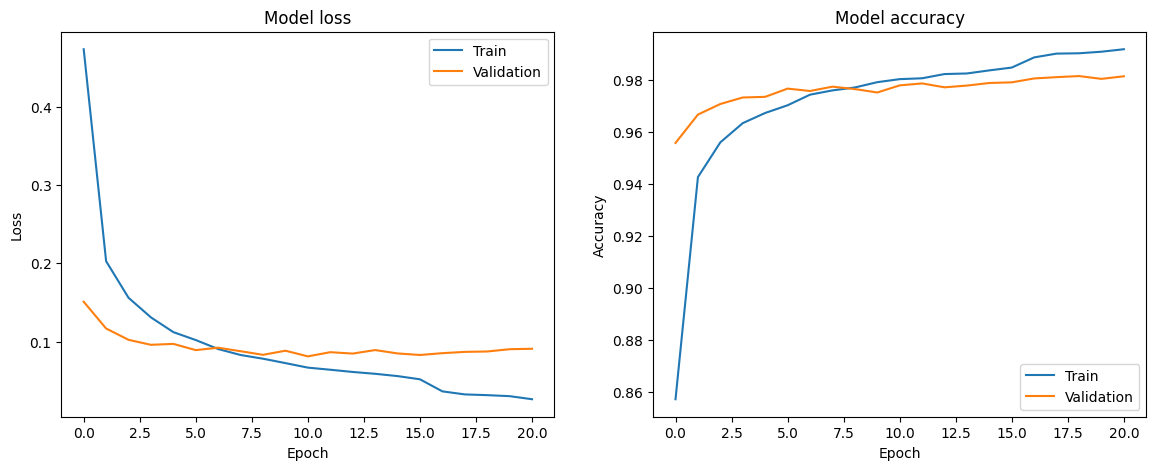

In [13]:
# Plot training & validation loss values
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.show()